<a href="https://colab.research.google.com/github/royam0820/DL/blob/master/amr_Fruit360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fruit 360 - Kaggle competition Infos

Fruit 360 is a [kaggle competition](https://www.kaggle.com/moltean/fruits).

- Total number of images: 80653.

- Training set size: 60318 images (one fruit or vegetable per image).

- Test set size: 20232 images (one fruit or vegetable per image).

- Multi-fruits set size: 103 images (more than one fruit (or fruit class) per image)

- Number of classes: 118 (fruits and vegetables).

- Image size: 100x100 pixels.

- Filename format: image_index_100.jpg (e.g. 32_100.jpg) or r_image_index_100.jpg (e.g. r_32_100.jpg) or r2_image_index_100.jpg or r3_image_index_100.jpg. "r" stands for rotated fruit. "r2" means that the fruit was rotated around the 3rd axis. "100" comes from image size (100x100 pixels).

- Different varieties of the same fruit (apple for instance) are stored as belonging to different classes.

## Files Infos
A high-quality, dataset of images containing fruits. The following fruits are included: Apples (different varieties: Crimson Snow, Golden, Golden-Red, Granny Smith, Pink Lady, Red, Red Delicious), Apricot, Avocado, Avocado ripe, Banana (Yellow, Red, Lady Finger), Blueberry, Cactus fruit, Cantaloupe (2 varieties), Carambula, Cherry (different varieties, Rainier), Cherry Wax (Yellow, Red, Black), Chestnut, Clementine, Cocos, Dates, Ginger Root, Granadilla, Grape (Blue, Pink, White (different varieties)), Grapefruit (Pink, White), Guava, Hazelnut, Huckleberry, Kiwi, Kaki, Kohlrabi, Kumsquats, Lemon (normal, Meyer), Lime, Lychee, Mandarine, Mango (Green, Red), Mangostan, Maracuja, Melon Piel de Sapo, Mulberry, Nectarine (Regular, Flat), Nut (Forest, Pecan), Onion (Red, White), Orange, Papaya, Passion fruit, Peach (different varieties), Pepino, Pear (different varieties, Abate, Kaiser, Monster, Red, Williams), Pepper (Red, Green, Yellow), Physalis (normal, with Husk), Pineapple (normal, Mini), Pitahaya Red, Plum (different varieties), Pomegranate, Pomelo Sweetie, Potato (Red, White), Quince, Rambutan, Raspberry, Redcurrant, Salak, Strawberry (normal, Wedge), Tamarillo, Tangelo, Tomato (different varieties, Maroon, Cherry Red, Yellow), Walnut.

## Imports

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import os
from fastai.imports  import *
from fastai.vision import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

## Getting the dataset

In [0]:
# installing the Kaggle API
! pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.5)


In [0]:
# Kaggle security key - json file
# you can complete this info from json file
# !echo '{"username":"USERNAME","key":"API_KEY"}' > /root/.kaggle/kaggle.json
!mkdir /root/.kaggle
!echo '{"username":"royam0829","key":"0b92434a802b99a487e0764fddb56c25"}' > /root/.kaggle/kaggle.json

In [0]:
# file permission to setup to owner can read and write
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# testing the access to the Kaggle website
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2690           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      10815           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4516           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         51           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       4178           False  
Kannada-MNIST                                  2019-12-17 23:59:00  Playground       Knowledge         21           False  
bigquery

In [0]:
# creating a directory : fruit360
if not os.path.exists('fruit360'):
    os.makedirs('fruit360')

In [7]:
# downloading the dataset
!kaggle datasets download -d moltean/fruits -p /content/fruit360

 99% 715M/721M [00:09<00:00, 76.6MB/s]
100% 721M/721M [00:09<00:00, 78.5MB/s]


In [9]:
print(os.listdir("../content/fruit360"))

['fruits-360', 'fruits.zip', 'readme.md']


In [0]:
# unzipping the dataset
!unzip /content/fruit360/fruits.zip -d /content/fruit360

## Creating the databunch

In [0]:
path = Path('./fruit360/fruits-360')


In [13]:
path.ls()

[PosixPath('fruit360/fruits-360/Training'),
 PosixPath('fruit360/fruits-360/test-multiple_fruits'),
 PosixPath('fruit360/fruits-360/LICENSE'),
 PosixPath('fruit360/fruits-360/Test'),
 PosixPath('fruit360/fruits-360/readme.md'),
 PosixPath('fruit360/fruits-360/papers')]

In [0]:
# batch size
bs = 64

In [0]:
# image size = 100x100 pixels
size = 100

In [0]:
# image augmentation
tfms=get_transforms()

In [0]:
# seed = np.random.seed(42)
# data = ImageDataBunch.from_folder(path, 
#         valid_pct=0.2,
#         ds_tfms=get_transforms(), 
#         size=size, 
#         num_workers=4, seed=seed).normalize(imagenet_stats)

In [0]:
# Fastai Datablock api
data = (ImageList.from_folder(path/'Training/')
        .split_by_rand_pct(valid_pct = 0.2, seed=seed)
        .label_from_folder()
        .add_test_folder(path/'Test/')
        .transform(tfms, size=size)
        .databunch(bs=bs, num_workers=4)
        .normalize(imagenet_stats))


NOTE: `get_transforms` = image augmentation

`get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Union[Collection[fastai.vision.image.Transform], NoneType]=None) -> Collection[fastai.vision.image.Transform]`

In [21]:
data.classes

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Dates',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Mango Red',
 'Mangostan',
 'Maracuja',
 'Melon Piel de Sapo',
 'Mulberry',


In [23]:
# number of classes
len(data.classes)

118

In [27]:
# length of the train, valid 
len(data.train_ds), len(data.valid_ds)

(47463, 11865)

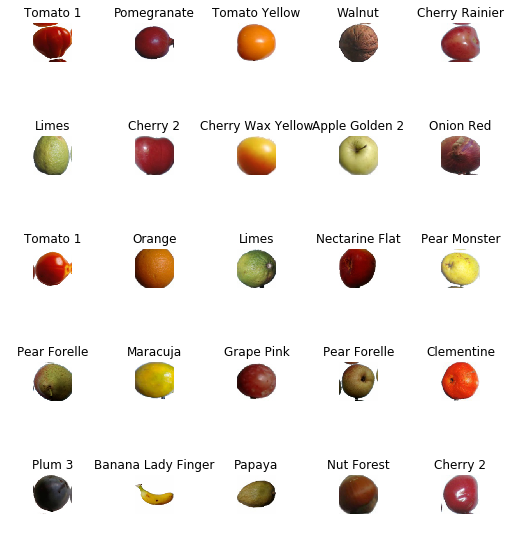

In [29]:
data.show_batch(rows=5, figsize=(7,8))

In [30]:
data.save

<bound method DataBunch.save of ImageDataBunch;

Train: LabelList (47463 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
Cherry 1,Cherry 1,Cherry 1,Cherry 1,Cherry 1
Path: fruit360/fruits-360/Training;

Valid: LabelList (11865 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
Banana Lady Finger,Nectarine,Apple Red Delicious,Avocado,Pepper Red
Path: fruit360/fruits-360/Training;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: fruit360/fruits-360/Training>

## Create the learner

#### Releasing the learner

In [0]:
learn.purge()

del learn
gc.collect()

torch.cuda.empty_cache()

In [31]:
learn = create_cnn(data, models.resnet34, metrics=[accuracy, error_rate])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 112581436.98it/s]


## Learner Infos

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (63733 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
Cherry 1,Cherry 1,Cherry 1,Cherry 1,Cherry 1
Path: /content/fruit360/fruits-360;

Valid: LabelList (15933 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
Pepino,Walnut,Pear Williams,Avocado ripe,Kohlrabi
Path: /content/fruit360/fruits-360;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=

## Training Cycle

In [32]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.146530,0.030647,0.991319,0.008681,02:51
1,0.061155,0.010461,0.996713,0.003287,02:48
2,0.020842,0.001006,0.999916,0.000084,02:49
3,0.014780,0.000618,0.999916,0.000084,02:50


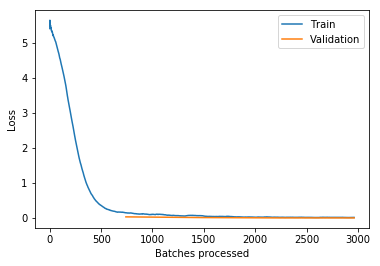

In [33]:
learn.recorder.plot_losses()

## Interpreting the Results

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [0]:
#interp.plot_confusion_matrix()

NOTE:  too many classes for a readable confution matrix

In [35]:
interp.most_confused(min_val=2)

[]

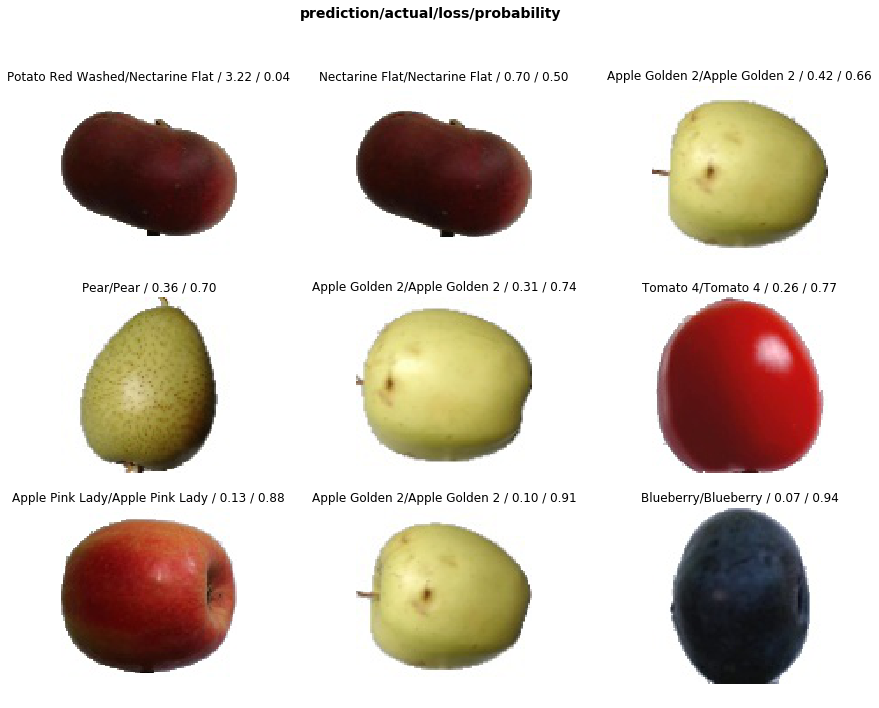

In [36]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

## Inference

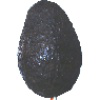

In [37]:
img = open_image('/content/fruit360/fruits-360/Test/Avocado ripe/100_100.jpg')
img

In [38]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Avocado ripe

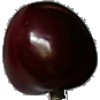

In [39]:
img = open_image('/content/fruit360/fruits-360/Test/Cherry 1/321_100.jpg')
img

In [40]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Cherry 1

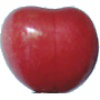

In [41]:
img = open_image('/content/fruit360/fruits-360/Test/Cherry 2/0_100.jpg')
img

In [42]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Cherry 2

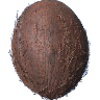

In [43]:
img = open_image('/content/fruit360/fruits-360/Test/Cocos/11_100.jpg')
img

In [44]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Cocos

## Inference from Google Images
We can find out that the dataset delivered is much too curated and cannot generalize much. See below

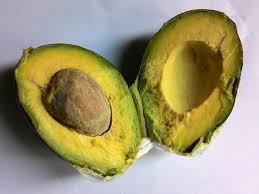

In [45]:
img = open_image('/content/fruit360/fruits-360/riped_avocado.jpeg')
img

In [46]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Pomelo Sweetie

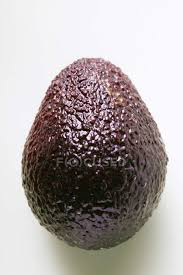

In [47]:
img = open_image('/content/fruit360/fruits-360/avocado.jpeg')
img

In [48]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Pear Forelle

## Putting your model in production
[github](https://github.com/royam0820/fastai-v3)

Serving results from an existing model is not resource intensive, so you do not need to run your model on GPU, a CPU will suffice.



### Know your classes

In [0]:
data.classes

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Dates',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Mango Red',
 'Mangostan',
 'Maracuja',
 'Melon Piel de Sapo',
 'Mulberry',


### Export the Model

In [0]:
learn.export()

NOTE: 
This will create a file named '**export.pkl**' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

### How does this look like in production?  
Base on Simon Willison contribution regarding his DL on cougar-or-not cougar, you can create something similar. S ([thanks](https://github.com/simonw/cougar-or-not) .  See sample below for his code.
```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

NOTE:  
1. you create a route as usual with a web app, indicate that is async so that it does not take all the machine procs while it is waiting for the response. 
2. Then you open your image, you call `learner.predict(img)` and you return that response.
3. then you can use javascript client or whatever to show it.

and that's it, this is basically the main content of your web app.

You can use Python Anywhere for free hosting for instance.

## Deployment Examples

[Bear classifier on Render](https://fastai-v3.onrender.com/)

[persons classifiation](https://dl-demo.now.sh/)

[your city from space](http://yourcityfrom.space/)

#### Know How

[Production Starter Kit - Render](https://course.fast.ai/deployment_render.html)

[Deploying on Zeit](https://course.fast.ai/deployment_zeit.html#upload-your-trained-model-file)


[Forume Discussions -  Productionizing models thread](https://forums.fast.ai/t/productionizing-models-thread/28353?u=henripal)

[web app for computer vision model](https://towardsdatascience.com/building-web-app-for-computer-vision-model-deploying-to-production-in-10-minutes-a-detailed-ec6ac52ec7e4)

[lankinen web app](https://medium.com/@lankinen/fastai-model-to-production-this-is-how-you-make-web-app-that-use-your-model-57d8999450cf)